In [117]:
import pandas as pd
import numpy as np
# import yaml
import copy
import matplotlib
import matplotlib.pyplot as plt
import warnings
import random
import collections
warnings.filterwarnings("ignore")
matplotlib.use('TkAgg')
import networkx as nx
%matplotlib inline

In [118]:
def import_network(path):
    """
    path = path to network data
    df = imported network data as a pandas dataframe
    """
    path = "C:/Users/Asus/Downloads/JUPY-nb/EL1.csv"  
    df = pd.read_csv(path)
    
    return df

def create_edge_list(df):
    
    edges = []
    for i in range(len(P1.edges())):
        edges.append(list(zip(df["Source"], df["Target"])))
    
    return edges

def create_node_list(df, which_layer):
    
    node_list = list(P1.nodes())
    
    return node_list


def calculate_gc_size(graph):
    """
    gc = giant component
    """
    
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    
    return gc_size


def normalize_gc_list(gc_list):
    "calculates gc size as a fraction of initial gc"
    
    return np.array(gc_list)/max(gc_list)

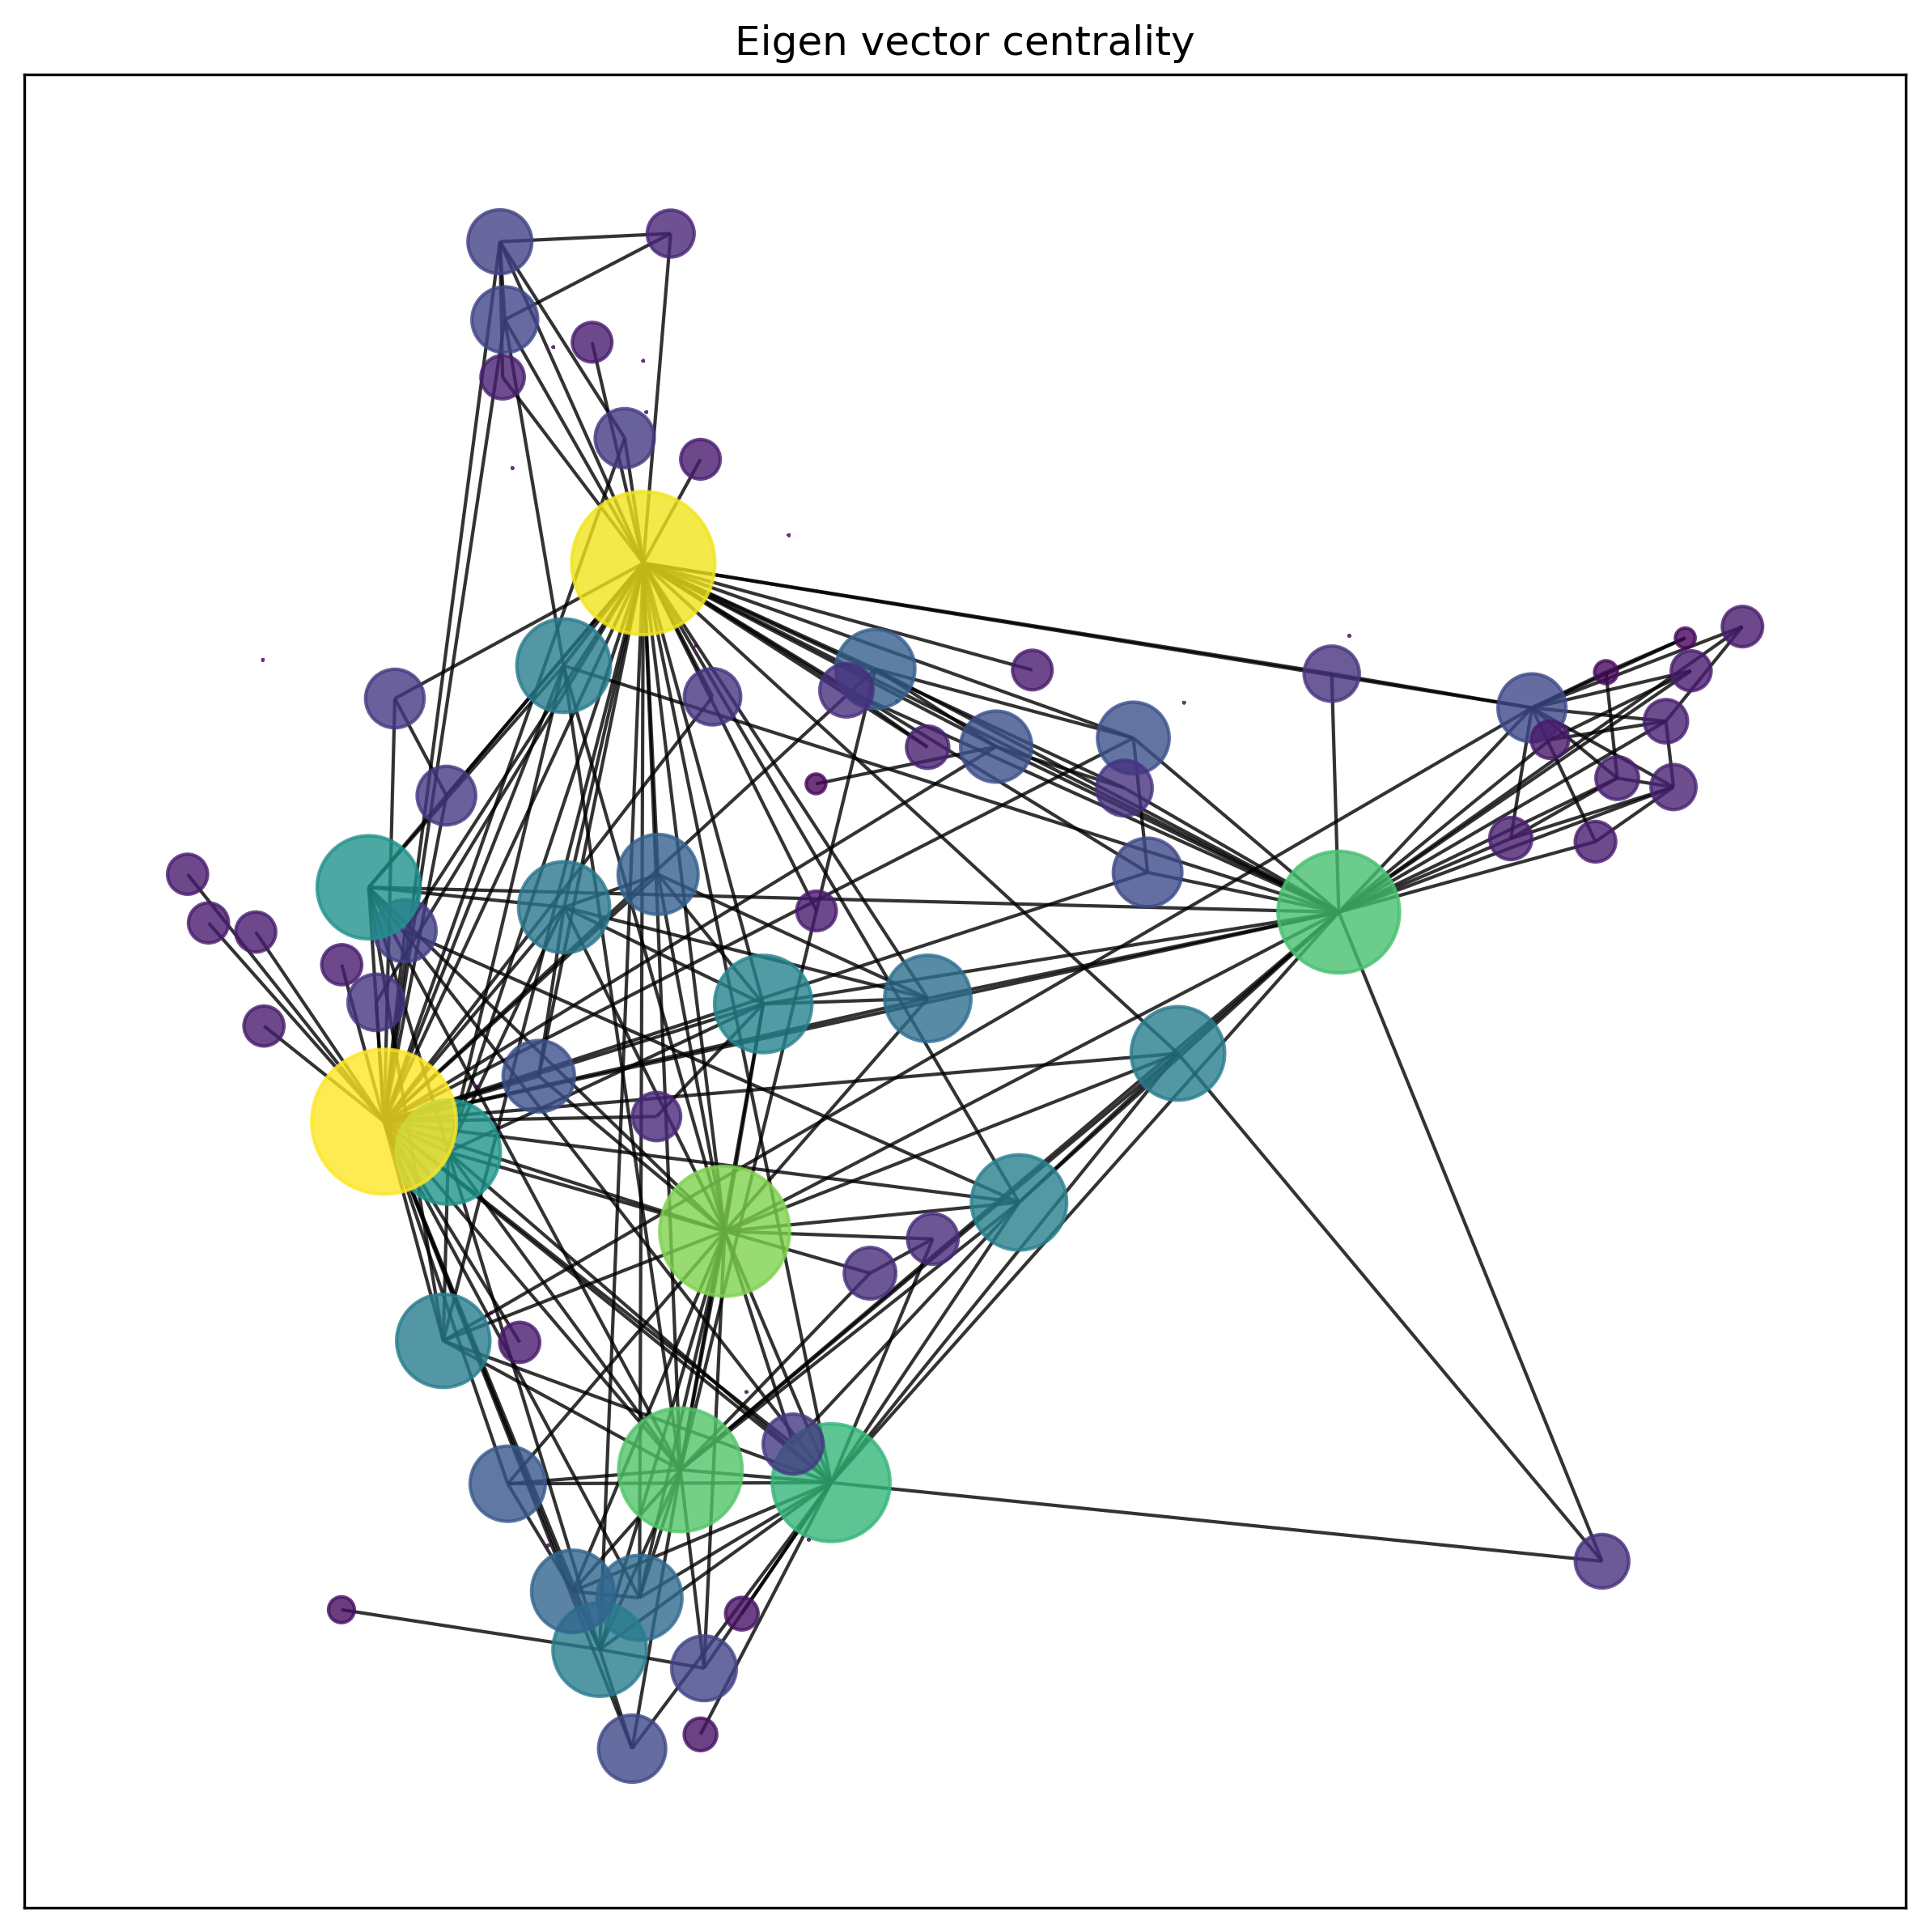

In [119]:
#import nodes and edges from CSV file
nodes=pd.read_csv("C:/Users/Asus/Documents/Projet/f/noded.csv")
edges=pd.read_csv("C:/Users/Asus/Documents/Projet/f/EL1.csv")   


#generate sourc,target and weight parameter
Source=edges.Source.values.flatten()
Target=edges.Target.values.flatten()
Weights=edges.Weight.values.flatten()



#add edge information
edge_info=[]

for i,j in enumerate(Source):
    temp=(j,Target[i],Weights[i])
    edge_info.append(temp)

node_list2=nodes.ID.values.flatten()
lon,lat=nodes.LON.values.flatten(),nodes.LAT.values.flatten()
zipped_pos=zip(lon,lat)


P1=nx.Graph()
P1.add_nodes_from(node_list2)
P1.add_weighted_edges_from(edge_info)



eigen_vector=nx.eigenvector_centrality(P1)
value_eigen_vector=list(eigen_vector.values())

node_size=[i*5000 for i in value_eigen_vector]
d_ian3 ={}


for i, n in enumerate(node_list2):
    d_ian3[n]= next(zipped_pos)

plt.figure(figsize=(10,10),dpi=300)
# sx= sfi.boundary.plot(figsize=(10,10), edgecolor='black')
plt.title('Eigen vector centrality')
nx.draw_networkx(P1,with_labels=False, pos=d_ian3,alpha=0.8, node_size=node_size, node_color=node_size, edge_color="black")


In [120]:
# if __name__ == "__main__":
    

#     with open(config_file, 'r') as f:
#         config = yaml.safe_load(f)
#         path = config['path']
#         n_layers = config['n_layers']
        
        
#         "create the network dataframe"
#         df = import_network(path)
path = "C:/Users/Asus/Downloads/JUPY-nb/EL1.csv"        
#         """
#         pick the layer to analyze
#         """
#         which_layer = config['which_layer']
#         print('Layer Analyzed: ', which_layer)

#         """
#         extract edge list (all layers) from the df
#         """
#         edges = create_edge_list(df, n_layers)
#         edge_list = edges[which_layer-1] 
edge_list = list(P1.edges())
        
#         """
#         extract node list for the layer to be analyzed
#         """
df_nodes=pd.read_csv("C:/Users/Asus/Documents/Projet/f/noded.csv")
df_nodes
node_list = list(P1.nodes())
#         node_list = create_node_list(df, which_layer)
    

In [121]:
"""
calculate initial giant component (gc) size
"""

initial_gc_size = calculate_gc_size(P1)
print(initial_gc_size)

71


In [122]:
# """Create Ensemble Lists of Nodes to Remove for Random Failure"""

node_list = list(P1.nodes())
node_list_copy = copy.deepcopy(node_list)

#n_nodes_to_remove = len(node_list)
n_nodes_to_remove = 10

sorted_nodes_by_random = []

for i in range(10):
    sorted_nodes_by_random.append(random.sample(node_list_copy, n_nodes_to_remove))


print(len(sorted_nodes_by_random[0]))
print(len(sorted_nodes_by_random))

10
10


# FAILURE PART OF THE PLOT

In [123]:
def remove_nodes(G, nodes_to_remove, edge_list):

    """
    nodes_to_remove: list

    edge_list: for this layer the orginal list of tuples (edges)
                e.g. [(1,77), (4,13)..]

    returns list of GC sizes and the graph remaining 
    """

    
    """initialize updated_edges list with original edge_list"""
    updated_edges = copy.deepcopy(edge_list)
    
    """initialize updated_G with orginial graph G"""
    updated_G = copy.deepcopy(G)
    initial_gc_size = calculate_gc_size(G)
    
    """empty list which will capture gc size as the network fails"""
    gc_list = []
    gc_list.append(initial_gc_size)
    count = 0

    for node in nodes_to_remove:
        
        updated_G.remove_edges_from(list(G.edges(node)))
        
        gc_list.append(calculate_gc_size(updated_G))
        updated_G.remove_node(node)
    
        count +=1
    
    #else:
    if len(nodes_to_remove) == len(node_list):
        gc_list.append(0)
    
    return gc_list, updated_G, count

In [124]:
# """BETWEENNESS"""
betweenness_c = nx.betweenness_centrality(P1)
temp = sorted(betweenness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_betweenness = [i[0] for i in temp]
print(len(sorted_nodes_by_betweenness))

88


In [125]:
# """Betweenness"""
nodes_to_remove = sorted_nodes_by_betweenness
gc_list_by_betweenness, updated_G, count = remove_nodes(P1, nodes_to_remove, edge_list)
gc_list_by_betweenness = normalize_gc_list(gc_list_by_betweenness)

In [126]:
#  node_list_floods = []
# node_list_floods = [43,74,34,84,68,37,41,16,50,66]
# node_List_floods = [38,34,23,50,16,2,30] cyber attcak
node_list_floods = [23,50,14,54,64,79,99,71,50,72]



In [127]:
# # """FLOOD FAILURE - GEO CLOSEST"""

# near_1 = [1,3,5,7,9,10,11,13,22,33,44,55,66,88,]

# near_1 = [15,57,49,25,43,74,34,84,68,37,41,16,50,66] FLood on east coast 
# near_1 = [56,75,85,84,57,48,83,70,54,79,12,42,51,68,41,38,34,23,50,16,2,30] cyber attack 
near_1 = [48,80,70,52,22,18,21,39,14,28,44,23,24,54,46,79,64,63,7,20,29,76,9,59,71,10,50,72,86,11,42,12,58,33,82,62,35,40,3,77
]
print(len(near_1))
sorted_nodes_by_floods = []
n_iter = 100
# # 100 ensembles of flooded nodes
for i in range(n_iter):
    temp = random.sample(near_1, len(near_1))
    sorted_nodes_by_floods.append(temp)

gc_list_by_floods = []
updated_G_list = []


# #100 ensemble failure due to floods(geo)
for i in range(n_iter):
    nodes_to_remove = sorted_nodes_by_floods[i]
    gc_temp, updated_G_temp, count = remove_nodes(P1, nodes_to_remove, edge_list)
    gc_list_by_floods.append(normalize_gc_list(gc_temp))
    updated_G_list.append(updated_G_temp)

print('Number of Affected Nodes: ', len(node_list_floods))
print(len(gc_list_by_floods))
print(len(gc_list_by_floods[0]))

40
Number of Affected Nodes:  10
100
41


In [128]:
sorted_nodes_by_floods[0]

[80,
 62,
 77,
 71,
 29,
 28,
 39,
 48,
 44,
 24,
 22,
 10,
 12,
 42,
 76,
 20,
 63,
 82,
 14,
 72,
 18,
 64,
 21,
 86,
 9,
 52,
 50,
 23,
 11,
 54,
 59,
 79,
 40,
 33,
 3,
 35,
 70,
 58,
 46,
 7]

In [129]:
# """FLOOD + TARGETED FAILURE"""

sorted_nodes_by_floods_targeted = []
gc_list_by_floods_targeted = []
updated_G_list = []

# sorted_nodes_by_betweenness = []
# my_dict = nx.betweenness_centrality(G)
# wanted_keys = near_3
# temp = dict((k, my_dict[k]) for k in wanted_keys if k in my_dict)
# sorted_nodes_by_betweenness = sorted(temp, reverse=True, key=lambda k: temp[k])


"""BETWEENNESS"""
betweenness_c = nx.betweenness_centrality(P1)
temp = sorted(betweenness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_betweenness = [i[0] for i in temp]
print(len(sorted_nodes_by_betweenness))



for i in range(n_iter):
    #temp = random.sample(near_1, len(near_1)) + random.sample(near_2, len(near_2[:18])) 
    temp = random.sample(near_1, len(near_1)) 
    
    for node in sorted_nodes_by_betweenness[:0]:
        if node not in temp:
            temp.append(node)
    
    sorted_nodes_by_floods_targeted.append(temp)
    

for i in range(n_iter):
    nodes_to_remove = sorted_nodes_by_floods_targeted[i]
    gc_temp, updated_G_temp, count = remove_nodes(P1, nodes_to_remove, edge_list)
    gc_list_by_floods_targeted.append(normalize_gc_list(gc_temp))
    updated_G_list.append(updated_G_temp)   
    
print("temp" )
print(len(temp))
print("gc_list_by_floods_targeted")
print(len(gc_list_by_floods_targeted[0]))

88
temp
40
gc_list_by_floods_targeted
41


In [130]:
gc_list_by_floods_targeted[0]

array([1.        , 0.98591549, 0.97183099, 0.97183099, 0.95774648,
       0.92957746, 0.91549296, 0.88732394, 0.87323944, 0.87323944,
       0.85915493, 0.84507042, 0.83098592, 0.74647887, 0.74647887,
       0.74647887, 0.73239437, 0.71830986, 0.70422535, 0.70422535,
       0.70422535, 0.69014085, 0.67605634, 0.67605634, 0.67605634,
       0.66197183, 0.64788732, 0.63380282, 0.63380282, 0.63380282,
       0.63380282, 0.63380282, 0.56338028, 0.56338028, 0.54929577,
       0.53521127, 0.53521127, 0.53521127, 0.53521127, 0.52112676,
       0.52112676])

# RECOVERY PART OF THE PLOT 

In [131]:
def add_nodes(G, updated_G, nodes_to_add, edge_list):
    
    """re: recovery
    """
    
    """initialize the graph object with the graph (updated_G) remaining post failure"""
    re_updated_G = copy.deepcopy(updated_G)
    edges_to_add = copy.deepcopy(edge_list)
     
    """empty list which will capture gc size as the network recovers"""
    re_gc_list = []
    count = 0
    initial_gc_size = calculate_gc_size(P1)
    
    if len(nodes_to_remove) == len(node_list):
        re_gc_list.append(0)
    
    for node in nodes_to_add:
        
        re_updated_G.add_node(node)
        re_updated_G.add_edges_from(list(P1.edges(node)))
        re_gc_list.append(calculate_gc_size(re_updated_G))
    
    
    re_gc_list.append(initial_gc_size)
    
    return re_gc_list, re_updated_G, count

In [132]:
# """RECOVERY - FLOODS GEO"""

re_gc_list_by_floods = []
re_updated_G_list = []

for i in range(n_iter):
    nodes_to_add = sorted_nodes_by_floods[i]
    re_gc_temp, re_updated_G_temp, count = add_nodes(P1, updated_G_list[i], nodes_to_add, edge_list)
    re_gc_list_by_floods.append(normalize_gc_list(re_gc_temp))
    re_updated_G_list.append(updated_G_temp)

print(len(re_gc_list_by_floods))
print(len(re_gc_list_by_floods[0]))

100
41


In [133]:
len(re_gc_list_by_floods)

100

In [134]:
# """Calculate Ensemble Mean - Flood Failure"""

gc_array_by_floods = np.array(gc_list_by_floods)
re_gc_array_by_floods = np.array(re_gc_list_by_floods)


gc_list_by_floods_mean = np.mean(gc_array_by_floods, axis=0)
re_gc_list_by_floods_mean = np.mean(re_gc_array_by_floods, axis=0)

print(len(gc_list_by_floods))
print(len(gc_list_by_floods_mean))

100
41


In [135]:
len(re_gc_list_by_floods)

100

In [136]:
"""Calculate Ensemble Mean - Flood + Targeted"""

gc_array_by_floods_targeted = np.array(gc_list_by_floods_targeted)
re_gc_array_by_floods_targeted = np.array(re_gc_list_by_floods)

gc_list_by_floods_targeted_mean = np.mean(gc_array_by_floods_targeted, axis=0)
re_gc_list_by_floods_mean = np.mean(re_gc_array_by_floods, axis=0)

print(len(gc_list_by_floods_targeted))
print(len(gc_list_by_floods_targeted_mean))

100
41


In [137]:
re_gc_list_by_floods_mean

array([0.56084507, 0.61873239, 0.66366197, 0.69507042, 0.7243662 ,
       0.76197183, 0.79507042, 0.82098592, 0.83676056, 0.8515493 ,
       0.8671831 , 0.88197183, 0.89535211, 0.91056338, 0.92084507,
       0.92859155, 0.93619718, 0.94253521, 0.94591549, 0.9515493 ,
       0.95915493, 0.96323944, 0.96774648, 0.97295775, 0.97633803,
       0.98126761, 0.98408451, 0.98732394, 0.98971831, 0.99056338,
       0.99211268, 0.99492958, 0.99549296, 0.99676056, 0.99774648,
       0.99859155, 0.99915493, 0.99971831, 0.99971831, 1.        ,
       1.        ])

In [138]:
len(gc_list_by_floods)

100

In [139]:
gc_list_by_floods

[array([1.        , 0.98591549, 0.97183099, 0.95774648, 0.94366197,
        0.92957746, 0.92957746, 0.92957746, 0.91549296, 0.90140845,
        0.90140845, 0.88732394, 0.87323944, 0.85915493, 0.84507042,
        0.83098592, 0.81690141, 0.81690141, 0.8028169 , 0.78873239,
        0.77464789, 0.76056338, 0.74647887, 0.74647887, 0.74647887,
        0.73239437, 0.71830986, 0.70422535, 0.64788732, 0.56338028,
        0.54929577, 0.54929577, 0.54929577, 0.54929577, 0.54929577,
        0.54929577, 0.54929577, 0.53521127, 0.53521127, 0.52112676,
        0.52112676]),
 array([1.        , 1.        , 0.98591549, 0.97183099, 0.95774648,
        0.95774648, 0.95774648, 0.91549296, 0.90140845, 0.88732394,
        0.87323944, 0.84507042, 0.83098592, 0.83098592, 0.81690141,
        0.81690141, 0.81690141, 0.8028169 , 0.78873239, 0.77464789,
        0.76056338, 0.74647887, 0.69014085, 0.67605634, 0.67605634,
        0.57746479, 0.57746479, 0.57746479, 0.54929577, 0.54929577,
        0.53521127, 0.5352

In [140]:
(gc_array_by_floods_targeted)

array([[1.        , 0.98591549, 0.97183099, ..., 0.53521127, 0.52112676,
        0.52112676],
       [1.        , 0.98591549, 0.97183099, ..., 0.53521127, 0.52112676,
        0.52112676],
       [1.        , 0.98591549, 0.97183099, ..., 0.53521127, 0.53521127,
        0.52112676],
       ...,
       [1.        , 0.97183099, 0.97183099, ..., 0.53521127, 0.52112676,
        0.52112676],
       [1.        , 0.98591549, 0.97183099, ..., 0.53521127, 0.53521127,
        0.52112676],
       [1.        , 0.98591549, 0.97183099, ..., 0.52112676, 0.52112676,
        0.52112676]])

In [141]:
len(gc_list_by_floods_targeted_mean)

41

#  PLOTTING

In [142]:
"""fraction of nodes removed on x-axis"""

node_frac = np.arange(len(gc_list_by_floods_targeted[0]))

print(len(node_frac))

41


In [143]:
node_frac

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [144]:
len(re_gc_list_by_floods)

100

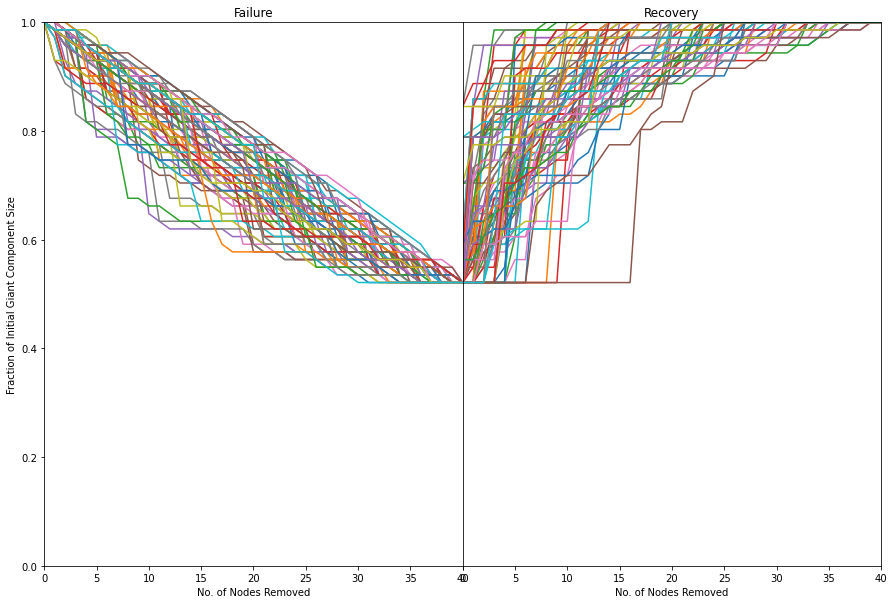

In [145]:
plt.figure(figsize=(15,10))

for i in range(n_iter):
    
    plt.subplot(1,2,1)
    plt.plot(node_frac, gc_list_by_floods[i], label='')
    
    plt.ylim(top=1, bottom=0)
    #plt.xlim(left=0, right=1)
    plt.xlabel('No. of Nodes Removed')
    plt.ylabel('Fraction of Initial Giant Component Size')
    plt.title('Failure')
    plt.margins(x=0, y=0)
    #plt.legend()

    plt.subplot(1,2,2)
    plt.plot(node_frac,re_gc_list_by_floods[i], label='')

    #plt.plot(node_frac, node_frac, '--')
    #plt.xlim(left=0)
    plt.ylim(bottom=0, top=1.0002)
    plt.yticks([])
    #plt.xticks([0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel('No. of Nodes Removed')
    plt.title('Recovery')
    plt.margins(x=0, y=0)
#     plt.legend()
 

plt.subplots_adjust(wspace=0)
# plt.suptitle('Random Failure (Ensemble N=10)', y=0.92, fontsize='16')
plt.show()

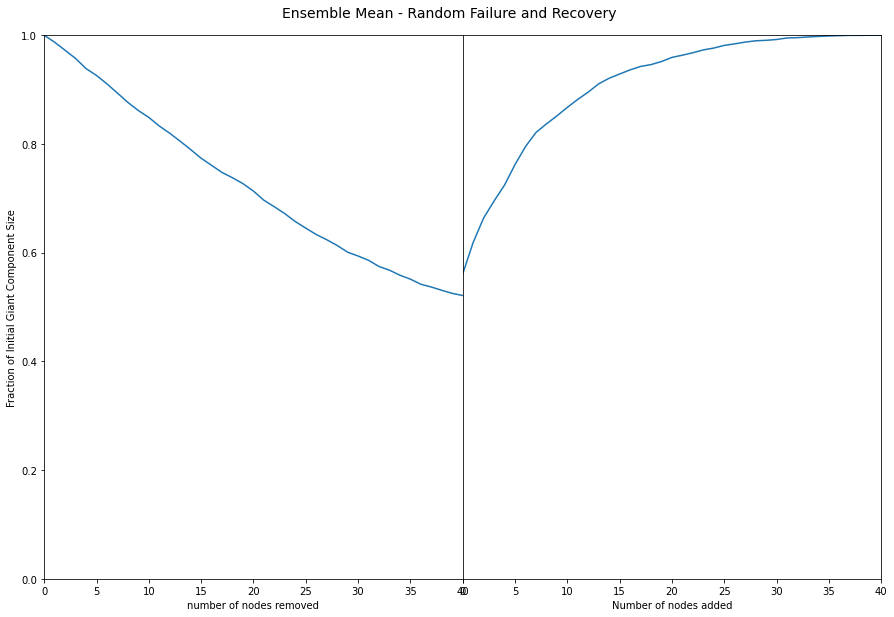

In [146]:
"""Plot Ensemble Mean"""

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.plot(node_frac, gc_list_by_floods_mean, '-', label='#degree')
plt.ylim(top=1, bottom=0)
# plt.xlim(left=0, right=1)
#plt.xlim(left=0, right=1)
plt.xlabel('number of nodes removed')
plt.ylabel('Fraction of Initial Giant Component Size')
plt.margins(x=0, y=0)
#plt.legend()

plt.subplot(1,2,2)
plt.plot(node_frac,re_gc_list_by_floods_mean, label='#degree')
    #plt.plot(node_frac, node_frac, '--')
# plt.xlim(left=0, right=1)
plt.ylim(bottom=0, top=1)
plt.yticks([])
# plt.xticks([0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel('Number of nodes added')
plt.margins(x=0, y=0)
#plt.legend()
plt.subplots_adjust(wspace=0)

plt.suptitle('Ensemble Mean - Random Failure and Recovery', y=0.92, fontsize='14')
plt.show()

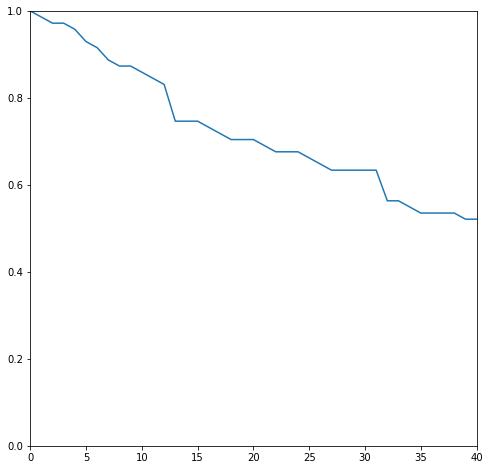

In [147]:
"""FLOOD + TARGETED FAILURE"""

plt.figure(figsize=(8,8))
plt.margins(0)
plt.ylim(top=1, bottom=0)

for i in range(1):
    plt.plot(node_frac, gc_list_by_floods_targeted[i])